# Problem 12

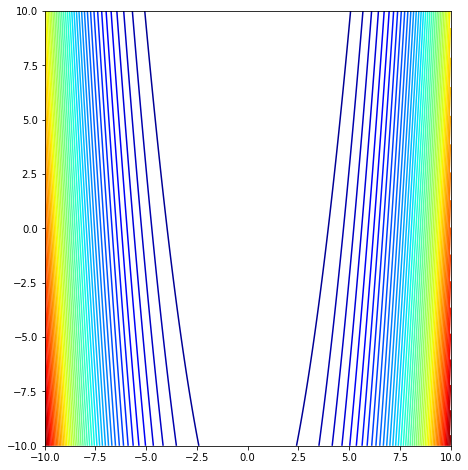

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
x1, x2 = np.meshgrid(X1, X2)
Z = 10*(x2 - x1**2)**2 + (1-x1)**2

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
ax.contour(x1, x2,Z, 50, cmap = 'jet')

# Problem 13

In [108]:
A = np.array([[2, -1, 0],[-1, 2, -1],[0, -1, 2]])
b = np.array([0,0,0])
x0 = np.array([0.0,1.0,2.0])

In [109]:
def hscg(A, b, x0, niter = 1000, tol= 1e-6):
    """
    This is the Python implementation CG-Algorithm via exact line search
    
    A, numpy array, is the A matrix in the decomposition
    b, numpy array, is the b matrix in the decomposition
    x0 is the initial point of the algorithm
    niter is the number of iterations, default is 1000
    """
    x_ = x0
    gk_ = A @ x_ + b
    d_ = -gk_
    for iteration in range(niter):
        print(np.round(x_, 3))
        lambda_ = (- gk_@ d_)/(d_ @ A @d_)
        if (np.abs(gk_) <= tol).all() :
            # break
            return x_
        else:
            x_ += lambda_*d_
            gk1_ = A @ x_ + b
            gamma_k1 = (gk1_ @ gk1_)/(gk_ @ gk_)
            d_ = -gk1_ + gamma_k1*d_
            gk_ = gk1_
    return x_

In [110]:
hscg(A, b, x0)

[0. 1. 2.]
[0.5 1.  0.5]
[0.556 0.444 0.333]
[0. 0. 0.]


array([1.11022302e-16, 5.55111512e-17, 0.00000000e+00])

In [105]:
from scipy.optimize import minimize
myfunc = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - x[0]*x[1] - x[1]*x[2]
minimize(myfunc, [0,1,2], method='Powell', tol=1e-6)

   direc: array([[-2.67397353e-01, -3.16500927e-01, -1.58250464e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.11316520e-04,  6.43568822e-04,  3.21784415e-04]])
     fun: 2.1775509271022898e-23
 message: 'Optimization terminated successfully.'
    nfev: 199
     nit: 6
  status: 0
 success: True
       x: array([-9.97465999e-18, -1.16009632e-17,  4.66641781e-12])

# Problem 15

In [2]:
from scipy.optimize import minimize
import numpy as np

x0 = np.array([-0.5, 1])
fun = lambda x: -12*x[1] + 4*x[0]**2 + 4*x[1]**2 - 4*x[0]*x[1]

res = minimize(fun, x0, method='CG', tol=1e-6)

In [53]:
fun([-0.5, 1])

-5.0

In [54]:
fun([1.5, 0])

9.0

In [55]:
fun([2.5, 3])

-5.0

## Part 3

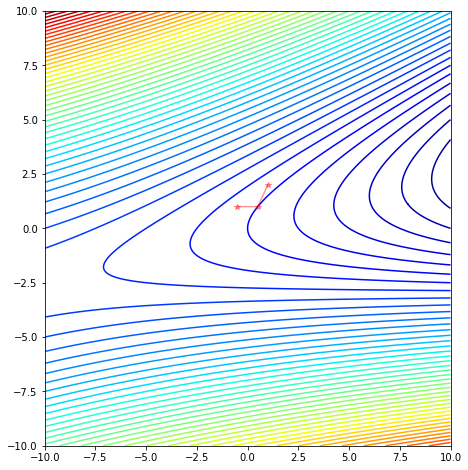

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X1 = np.linspace(-10, 10, 1000)
X2 = np.linspace(-10, 10, 1000)
 
X,Y = np.meshgrid(X1, X2)
Z = -12*X + 4*Y**2 + 4*Y**2 - 4*X*Y

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 2)
# ax = plt.axes()
#ax.plot_surface(X1, X2, Y,
#                cmap='binary')
ax.contour(X,Y,Z, 50, cmap = 'jet')

iter_x = [-0.5,0.5,1]
iter_y = [1, 1, 2]
# iter_z = [10,20,30]
ax.plot(iter_x, iter_y, color = 'r', marker = '*', alpha = .4)

# Problem 18

In [1]:
import numpy as np
import scipy as sci
import math

# use lambda function to define lambda function as stated in the original problem
myfun = lambda x: 0.5*(x[0]*math.exp(x[1]) - 3)**2 + 0.5*(x[0]*math.exp(x[1]*2) - 4)**2 + 0.5*(x[0]*math.exp(x[1]*4) - 6)**2 + \
        0.5*(x[0]*math.exp(x[1]*5) - 11)**2 + 0.5*(x[0]*math.exp(x[1]*8) - 20)**2

x0 = [3, 0.5]

new_earch_method = ['Nelder-Mead', 'Powell', 'CG', 'BFGS','TNC',  'L-BFGS-B', 'TNC', 
                    'trust-constr', 'SLSQP']

In [13]:
all_res = []
from scipy.optimize import minimize
for method_ in new_earch_method:
    print(method_)
    res_list = [method_]
    nelder = sci.optimize.minimize(myfun, x0, method=method_, tol=1e-6)
    res_list.append(np.round(nelder.nit, 3))
    res_list.extend(np.round(nelder.x, 3))
    res_list.append(np.round(nelder.fun, 3))
    all_res.append(res_list)

Nelder-Mead
Powell
CG
BFGS
TNC
L-BFGS-B
TNC
trust-constr


C:\Users\16477\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
C:\Users\16477\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


SLSQP


Add Gradient

In [26]:
import sympy as sym
x0 = sym.Symbol('x0')
x1 = sym.Symbol('x1')
phi_1 = 0.5*(x0*sym.exp(x1) - 3)**2 + 0.5*(x0*sym.exp(x1*2) - 4)**2 + 0.5*(x0*sym.exp(x1*4) - 6)**2 + \
0.5*(x0*sym.exp(x1*5) - 11)**2 + 0.5*(x0*sym.exp(x1*8) - 20)**2
phi_1

0.5*(x0*exp(x1) - 3)**2 + 0.5*(x0*exp(2*x1) - 4)**2 + 0.5*(x0*exp(4*x1) - 6)**2 + 0.5*(x0*exp(5*x1) - 11)**2 + 0.5*(x0*exp(8*x1) - 20)**2

In [28]:
phi_0_prime = phi_1.diff(x1)
phi_0_prime

1.0*x0*(x0*exp(x1) - 3)*exp(x1) + 2.0*x0*(x0*exp(2*x1) - 4)*exp(2*x1) + 4.0*x0*(x0*exp(4*x1) - 6)*exp(4*x1) + 5.0*x0*(x0*exp(5*x1) - 11)*exp(5*x1) + 8.0*x0*(x0*exp(8*x1) - 20)*exp(8*x1)

In [29]:
print(phi_0_prime)

1.0*x0*(x0*exp(x1) - 3)*exp(x1) + 2.0*x0*(x0*exp(2*x1) - 4)*exp(2*x1) + 4.0*x0*(x0*exp(4*x1) - 6)*exp(4*x1) + 5.0*x0*(x0*exp(5*x1) - 11)*exp(5*x1) + 8.0*x0*(x0*exp(8*x1) - 20)*exp(8*x1)


In [30]:
phi_1_prime = phi_1.diff(x0)
phi_1_prime

1.0*(x0*exp(x1) - 3)*exp(x1) + 1.0*(x0*exp(2*x1) - 4)*exp(2*x1) + 1.0*(x0*exp(4*x1) - 6)*exp(4*x1) + 1.0*(x0*exp(5*x1) - 11)*exp(5*x1) + 1.0*(x0*exp(8*x1) - 20)*exp(8*x1)

In [31]:
print(phi_1_prime)

1.0*(x0*exp(x1) - 3)*exp(x1) + 1.0*(x0*exp(2*x1) - 4)*exp(2*x1) + 1.0*(x0*exp(4*x1) - 6)*exp(4*x1) + 1.0*(x0*exp(5*x1) - 11)*exp(5*x1) + 1.0*(x0*exp(8*x1) - 20)*exp(8*x1)


In [39]:
def obj_grad(x):
    return np.array([1.0*x[0]*(x[0]*math.exp(x[1]) - 3)*math.exp(x[1]) + 2.0*x[0]*(x[0]*math.exp(2*x[1]) - 4)*math.exp(2*x[1]) + 4.0*x[0]*(x[0]*math.exp(4*x[1]) - 6)*math.exp(4*x[1]) + 
            5.0*x[0]*(x[0]*math.exp(5*x[1]) - 11)*math.exp(5*x[1]) + 8.0*x[0]*(x[0]*math.exp(8*x[1]) - 20)*math.exp(8*x[1]), 
            1.0*(x[0]*math.exp(x[1]) - 3)*math.exp(x[1]) + 1.0*(x[0]*math.exp(2*x[1]) - 4)*math.exp(2*x[1]) + 1.0*(x[0]*math.exp(4*x[1]) - 6)*math.exp(4*x[1]) + 
            1.0*(x[0]*math.exp(5*x[1]) - 11)*math.exp(5*x[1]) + 1.0*(x[0]*math.exp(8*x[1]) - 20)*math.exp(8*x[1])])

In [63]:
search_method = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B', 'TNC', 
                  'SLSQP', 'trust-constr', ]

all_res = []
from scipy.optimize import minimize
for method_ in search_method:
    print(method_)
    res_list = [method_]
    nelder = sci.optimize.minimize(myfun, x0, method=method_, tol=1e-6, jac=obj_grad)
    res_list.append(np.round(nelder.nit, 3))
    res_list.extend(np.round(nelder.x, 3))
    res_list.append(np.round(nelder.fun, 3))
    all_res.append(res_list)

Nelder-Mead
Powell
CG
BFGS
Newton-CG
L-BFGS-B
TNC
SLSQP
trust-constr


C:\Users\16477\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
C:\Users\16477\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


In [64]:
import pandas as pd 
pd.DataFrame(all_res).to_csv("problem18_part2.csv")

## Part 2

### Curve Fitting Approach

### Least Squares Approach

In [8]:
import scipy as sci
from scipy.optimize import curve_fit

x0 = np.array([3, 0.5])
least_square_1 = sci.optimize.least_squares(myfun, x0)
print(least_square_1)

# least_square_2 = sci.optimize.least_squares(myfun, x0, method='lm')
# print(least_square_2)

 active_mask: array([0., 0.])
        cost: 10.33947055182201
         fun: array([4.54741037])
        grad: array([ 21.1075407 , -11.52084609])
         jac: array([[ 4.64166173, -2.53349602]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 200
        njev: 193
  optimality: 21.107540701948405
      status: 0
     success: False
           x: array([3.44669474, 0.21754178])
